In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import math 
import astropy
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.stats as sps

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [3]:
#SciServer Modules
import SciServer
from SciServer import CasJobs

In [4]:
AGNIDs_DF = pd.read_excel('Dwarf_SF_ID.xlsx')
AGNIDs = pd.DataFrame(AGNIDs_DF)
AGNIDs = AGNIDs.values.tolist()

AGNID = []

for i in range(len(AGNIDs)):
    AGNID.append(AGNIDs[i])
    
print('Target number of AGN Galaxies: ' + str(len(AGNID)) + '\n')
print('MaNGA IDs: ' + str(AGNID))

Target number of AGN Galaxies: 2372

MaNGA IDs: [['1-153412'], ['1-384306'], ['1-201961'], ['1-50666'], ['1-36448'], ['1-36298'], ['1-230987'], ['1-567457'], ['1-300663'], ['1-232151'], ['1-278195'], ['1-241291'], ['1-54506'], ['1-54655'], ['1-60719'], ['1-301386'], ['1-76813'], ['1-78143'], ['1-456942'], ['1-522063'], ['1-522093'], ['1-321149'], ['1-404136'], ['1-244163'], ['1-195917'], ['1-368219'], ['1-159265'], ['1-122203'], ['1-458686'], ['1-412279'], ['1-218748'], ['1-605721'], ['1-301541'], ['1-301561'], ['1-55093'], ['1-283108'], ['1-233389'], ['1-195370'], ['1-80575'], ['1-234285'], ['1-151205'], ['1-176258'], ['1-1363'], ['1-633967'], ['1-136024'], ['1-249612'], ['1-325866'], ['1-283638'], ['1-336081'], ['1-335102'], ['1-333784'], ['1-337228'], ['1-273098'], ['1-96307'], ['1-193038'], ['1-33617'], ['1-35323'], ['1-116990'], ['1-118491'], ['1-39995'], ['1-39946'], ['1-40776'], ['1-404898'], ['1-624292'], ['1-386759'], ['1-585493'], ['1-63597'], ['1-138181'], ['1-62169'], ['1-6

In [5]:
Properties = """select drp.MaNGAid,
                drp.z,
                drp.nsa_elpetro_mass as GalMass,
                dap.ha_gsigma_1re as Ha_VelDisp,
                dap.nsa_sersic_th50 as Distance,
                
                dap.daptype from mangaDRPall as drp
                JOIN mangaDAPall as dap on dap.mangaid = drp.mangaid
                WHERE (drp.z < 0.15) and (drp.z > 0.001)
                and dap.daptype = 'HYB10-MILESHC-MASTARHC2'
                and (drp.nsa_elpetro_mass < 5e+9)"""

Selection1 = CasJobs.executeQuery(Properties, 'dr17')
print(Selection1)

MaNGAIDs_raw = Selection1['MaNGAid']
GalMass_raw = Selection1['GalMass']
Radius_raw = Selection1['Distance']
Ha_VelDisp_raw = Selection1['Ha_VelDisp']

       MaNGAid         z       GalMass  Ha_VelDisp   Distance  \
0      1-60709  0.022900  1.606570e+09    10.83504   8.692530   
1       1-1851  0.033739  2.044650e+09   222.28350   2.636887   
2     1-456655  0.018372  1.531814e+09    22.02893  10.606540   
3     1-456840  0.022810  3.676680e+09   228.24430   5.747246   
4     1-300599  0.022509  1.439089e+09   229.56940   3.209231   
...        ...       ...           ...         ...        ...   
3412   1-50955  0.034817  2.174680e+09   172.21890   2.880000   
3413  1-383812  0.016531  1.956970e+09   172.93760   4.878570   
3414  1-383562  0.044212  4.147190e+09    29.80632   6.096850   
3415  1-458047  0.038227  1.907890e+09    27.89825   4.132440   
3416  1-591200  0.018756  3.112340e+09   424.82500  57.775200   

                      daptype  
0     HYB10-MILESHC-MASTARHC2  
1     HYB10-MILESHC-MASTARHC2  
2     HYB10-MILESHC-MASTARHC2  
3     HYB10-MILESHC-MASTARHC2  
4     HYB10-MILESHC-MASTARHC2  
...                       .

In [6]:
MaNGAIDs = []
GalMass = []
Radius = []

Ha_VelDisp = []

for i in range(len(MaNGAIDs_raw)):
    MaNGAIDs.append([MaNGAIDs_raw[i]])

for i in range(len(GalMass_raw)):
    GalMass.append([GalMass_raw[i]])
    
for i in range(len(Radius_raw)):
    Radius.append([Radius_raw[i]])
    
for i in range(len(Ha_VelDisp_raw)):
    Ha_VelDisp.append([Ha_VelDisp_raw[i]])
    
print('No. of MaNGA IDs: ' + str(len(MaNGAIDs)))
print('No. of Galaxy Mass Values: ' + str(len(GalMass)))
print('No. of Radius Values: ' + str(len(Radius)))
print('No. of Ha Velocity Dispersion Values: ' + str(len(Ha_VelDisp)))

No. of MaNGA IDs: 3417
No. of Galaxy Mass Values: 3417
No. of Radius Values: 3417
No. of Ha Velocity Dispersion Values: 3417


In [7]:
GalIDs_fin = []
GalMass_fin = []
Radius_fin = []

Ha_VelDisp_fin = []

for i in range(len(AGNID)):
    for x in range(len(MaNGAIDs)):
        if (AGNID[i] == MaNGAIDs[x]):
            GalIDs_fin.append(MaNGAIDs[x])
            GalMass_fin.append(GalMass[x])
            Radius_fin.append(Radius[x])
            Ha_VelDisp_fin.append(Ha_VelDisp[x])
            break

#Target quantity is 531
print('Galaxies: ' + str(len(GalIDs_fin)))
print('Galaxy Mass Values: ' + str(len(GalMass_fin)))
print('Radius Values: ' + str(len(Radius_fin)) + '\n')
print('Ha Velocity Dispersion Values: ' + str(len(Ha_VelDisp_fin)))

Galaxies: 2372
Galaxy Mass Values: 2372
Radius Values: 2372

Ha Velocity Dispersion Values: 2372


In [8]:
#Removing brackets from each element
for i in range(len(Ha_VelDisp_fin)):
    Ha_VelDisp_fin[i] = str(Ha_VelDisp_fin[i])[1:]
    Ha_VelDisp_fin[i] = str(Ha_VelDisp_fin[i])[:-1]
    
for i in range(len(GalMass_fin)):
    GalMass_fin[i] = str(GalMass_fin[i])[1:]
    GalMass_fin[i] = str(GalMass_fin[i])[:-1]

In [9]:
#Merging values into a 2D array to select points graphed
PltPts2D = np.array(list(zip(Ha_VelDisp_fin, GalMass_fin)))

print('Length: ' + str(len(PltPts2D)) + '\n')
PltPts2D = pd.DataFrame(PltPts2D)

PltPts2D

Length: 2372



,0,1
0,31.45618,2332640000.0
1,30.59973,1530360000.0
2,53.20382,2878000000.0
3,34.64712,4226870000.0
4,31.97787,2237890000.0
...,...,...
2367,49.95733,2234590000.0
2368,34.93745,2707380000.0
2369,28.86692,1621060000.0
2370,21.68173,839052000.0


In [10]:
for i in range(2372):
    PltPts2D[0][i] = float(PltPts2D[0][i])
    PltPts2D[1][i] = float(PltPts2D[1][i])
    
print(PltPts2D)

            0            1
0     31.4562  2.33264e+09
1     30.5997  1.53036e+09
2     53.2038    2.878e+09
3     34.6471  4.22687e+09
4     31.9779  2.23789e+09
...       ...          ...
2367  49.9573  2.23459e+09
2368  34.9374  2.70738e+09
2369  28.8669  1.62106e+09
2370  21.6817  8.39052e+08
2371  177.369  3.93266e+09

[2372 rows x 2 columns]


In [11]:
#Omitting values less than zero
PltPts2D_Ha =[]
PltPts2D_Rad =[]

for i in range(len(PltPts2D)):
    if((0 < PltPts2D[0][i] < 65) and (0 < PltPts2D[1][i])):
        PltPts2D_Ha.append(PltPts2D[0][i])
        PltPts2D_Rad.append(PltPts2D[1][i])
        
PltPts2D_z = np.array(list(zip(PltPts2D_Ha, PltPts2D_Rad)))

print('2D Plot Point Array Length: ' + str(len(PltPts2D_z)) + '\n')
print(min(PltPts2D_Rad))
print(max(PltPts2D_Rad))
print(PltPts2D_z)

2D Plot Point Array Length: 1882

32074100.0
4999580000.0
[[3.145618e+01 2.332640e+09]
 [3.059973e+01 1.530360e+09]
 [5.320382e+01 2.878000e+09]
 ...
 [3.493745e+01 2.707380e+09]
 [2.886692e+01 1.621060e+09]
 [2.168173e+01 8.390520e+08]]


In [12]:
#Finding min and max Ha values
#MinHa = min(PltPts2D_Ha)
#MaxHa = max(PltPts2D_Ha)

#print('Minimum: ' + str(MinHa))
#print('Maximum: ' + str(MaxHa))

In [13]:
#Filtering based on IQR
#OutliersX = []
#OutliersY = []
#PltPtsIQR_Ha =[]
#PltPtsIQR_Rad =[]

#for i in range(len(PltPts2D_z)):
    #if(((abs(PltPts2D_z[i][0]) - MinHa) < RNG) or ((abs(PltPts2D_z[i][1]) - MaxHa) > RNG)):
        #OutliersX.append(PltPts2D_z[i][0])
        #OutliersY.append(PltPts2D_z[i][1])
    #else:
        #PltPtsIQR_Ha.append(PltPts2D_z[i][0])
        #PltPtsIQR_Rad.append(PltPts2D_z[i][1])
        
#PltPts2D_fin = np.array(list(zip(PltPtsIQR_Ha, PltPtsIQR_Rad)))

#print('2D Plot Point Array Length: ' + str(len(PltPts2D_fin)) + '\n')
#print(PltPts2D_fin)

In [14]:
#Splitting elements back into two lists for plotting
Ha_VelDisp_plt = []
GalMass_plt = []

for i in range(len(PltPts2D_z)):
    Ha_VelDisp_plt.append([PltPts2D_z[i][0]])
    GalMass_plt.append([PltPts2D_z[i][1]])
    
print('Ha Velocity Dispersion Values: ' + str(len(Ha_VelDisp_plt)))
print('Radius Values: ' + str(len(GalMass_plt)))

print(Ha_VelDisp_plt)
print(GalMass_plt)

Ha Velocity Dispersion Values: 1882
Radius Values: 1882
[[31.45618], [30.59973], [53.20382], [34.64712], [31.97787], [18.61466], [50.46133], [32.11973], [22.6617], [20.40661], [20.50743], [23.18665], [16.8738], [24.88992], [18.547], [51.69305], [16.73943], [35.86583], [26.149], [22.84163], [28.14173], [18.20927], [27.81254], [20.45909], [20.08574], [30.95416], [34.83286], [27.89532], [22.20941], [17.72917], [21.23661], [22.60418], [22.88499], [24.35157], [21.8434], [27.94947], [35.83764], [22.52514], [22.16562], [34.00848], [46.59632], [26.14038], [28.22098], [24.87229], [18.43922], [25.14449], [29.16978], [27.99813], [23.38166], [27.69137], [18.63492], [48.17315], [20.12302], [30.96645], [24.04111], [29.83865], [27.59266], [28.77459], [28.00558], [26.07467], [56.17967], [20.15967], [24.67965], [31.77475], [51.03027], [18.92003], [24.74802], [33.79505], [26.36481], [38.31649], [19.7644], [24.22784], [16.54204], [26.51013], [37.14891], [28.84035], [19.62703], [30.38977], [24.8015], [23.

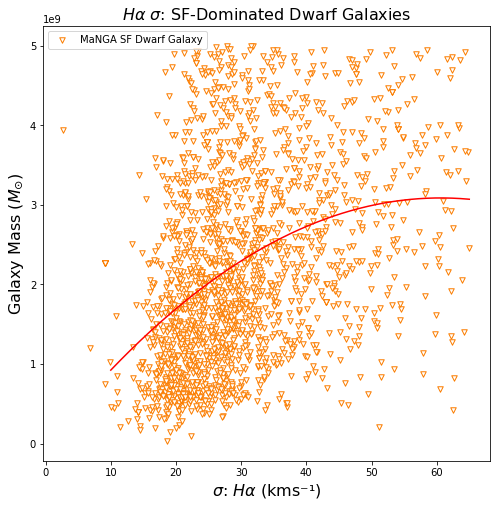

In [18]:
plt.figure(figsize = (8, 8))
plt.title('$H{\u03B1}$ ${\u03C3}$: SF-Dominated Dwarf Galaxies', fontsize = 16)

plt.scatter(Ha_VelDisp_plt, 
            GalMass_plt, 
            color = 'white', 
            edgecolor = '#fb7d00', 
            marker = 'v', 
            alpha = 1, 
            s = 30, 
            label = "MaNGA SF Dwarf Galaxy")

plt.xlabel('${\u03C3}$: $H{\u03B1}$ (kms\u207B\u00B9)', fontsize = 16)
plt.ylabel('Galaxy Mass ($M_{\odot}$)', fontsize = 16)

#plt.xlim(10, 65)
#plt.ylim(0, 25)

#Regression Line
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(Ha_VelDisp_plt)

Reg = LinearRegression()
Reg.fit(X_poly, GalMass_plt)

XValues_lin = np.linspace(10, 65, 1882).reshape(-1, 1)
XValues_poly = poly_features.transform(XValues_lin)

YValues = Reg.predict(XValues_poly)

plt.plot(XValues_lin, YValues, c ='red')
legend = plt.legend(loc = 'upper left')
plt.savefig('Ha Velocity Dispersion: Dwarf SF', dpi = 600, bbox_inches = 'tight')
plt.show()

In [19]:
#Calculating p-value
mod = sm.OLS(GalMass_plt, Ha_VelDisp_plt)
fii = mod.fit()
p_value = fii.summary2().tables[1]['P>|t|']

print(p_value)
#p < .0001

x1    0.0
Name: P>|t|, dtype: float64


In [22]:
#Calculating r-value
r2 = r2_score(GalMass_plt, YValues)
r = (np.sqrt(abs(r2)))
print('r = ' + str(r))

r = 0.5762449483432232
